# Script per la stima di $g$

## Importing libraries

In [18]:
from os import listdir

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

from modules import functions

plt.style.use("modules/mystyle.mplstyle")

## Importing data

### Get the datasets for fotogate

In [19]:
# * Nomi dei datasets per il fotogate datasets_names_mattia
dataset_names_mattia = [
    f"misura fototraguardo lunghezza {'1(min)' if i == 0 else f'{i+1}_tia'}"
    for i in range(5)
]
# da "Misure accel grav giorno2.xlsx"
lunghezze_associate_mattia = [206.10, 172.58, 128.24, 99.22, 67.90]

dataset_names_matilde = [
    f"misura fototraguardo lunghezza {f'{i+1}_mat'}" for i in range(1, 5)
]
# da "Misure accel grav giorno2.xlsx"
lunghezze_associate_matilde = [172.58, 127.06, 99.08, 67.86]

dataset_names_filippo = [
    f"misura fototraguardo lunghezza {f'{i+1}_fil'}" for i in range(2, 5)
]
# da "Misure accel grav giorno2.xlsx"
lunghezze_associate_filippo = [127.46, 99.06, 67.56]

dataset_different_angles = [
    "misure fototraguardo, angoli diversi, 3-5-7-10-15 gradi",
]
# da "Misure accel grav giorno2.xlsx"
lunghezze_associate_angoli = [30.00]

### Load all data

In [20]:
data_crono_mattia = pd.read_excel(
    "data/Misure accel grav giorno2.xlsx", sheet_name="Mattia"
)
data_crono_matilde = pd.read_excel(
    "data/Misure accel grav giorno2.xlsx", sheet_name="Matilde"
)
data_crono_filippo = pd.read_excel(
    "data/Misure accel grav giorno2.xlsx", sheet_name="Filippo"
)

data_cronos = [data_crono_mattia, data_crono_matilde, data_crono_filippo]

# ! come lo faccio decentemente per il fotogate?
# data_fotogate = pd.read_csv()

## Analysis

### For the cronometer

[0.00075771 0.00075329 0.00061925 0.00065848 0.00079317 0.00073817]
[0.00050923 0.00061546 0.00055978 0.00067311 0.00096842 0.00059294]
[0.00048906 0.00073265 0.00047284 0.00064823 0.00057755 0.0005961 ]


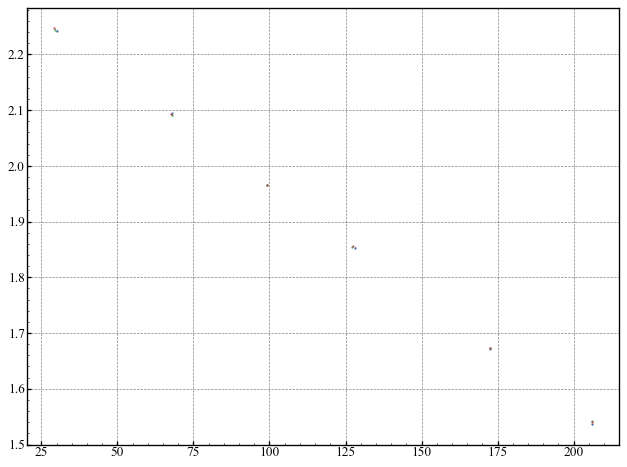

In [22]:
for dataset in data_cronos:
    X = dataset.columns.values
    periods = dataset.T.to_numpy()
    mean_periods, std_periods = functions.calculate_moving_average(periods)

    Y = np.square(mean_periods)
    Yerr = 2 * np.multiply(mean_periods, std_periods)
    print(Yerr)

    plt.errorbar(X, Y, Yerr, xerr=0.02, ls="", marker=".")
    # plt.savefig("test.png")